<a href="https://colab.research.google.com/github/sonicmortis/DIF62310_KelasB_25_2311532020/blob/main/Praktikum%202/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas, lalu simpan link dataset dalam dataset_url, lalu konversi menjadi dataframe dalam df, lalu tampilkan

In [ ]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/sonicmortis/DIF62310_KelasB_25_2311532020/refs/heads/main/Dataset/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


simpan semua nama kolom df kecuali kolom Outcome dalam feature_cols, X untuk menyimpan kolom features, y untuk menyimpan label

In [ ]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
y = df.Outcome

print masing-masing shape untuk X dan y untuk melihat jumlah baris dan kolomnya

In [ ]:
print(X.shape)
print(y.shape)

(768, 7)
(768,)


import scikitlearn untuk membagi data menjadi data train dan data test, dengan ukuran tes 30%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import logistic regression dari scikitlearn yang disimpan dalam object logreg, lakukan training dengan parameter X_train dan y_train, simpan hasil prediksi dari X_test di dalam y_pred

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


import metrics, simpan confusion metric di dalam cnf_matrix, lalu tampilkan hasilnya

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[120,  31],
       [ 30,  50]])

visualisasikan confusion matrix menggunakan library Matplotlib dan Seaborn. Confusion matrix adalah tabel yang sering digunakan untuk mengevaluasi performa model klasifikasi dengan membandingkan prediksi model terhadap label aktual

Text(0.5, 427.9555555555555, 'Predicted label')

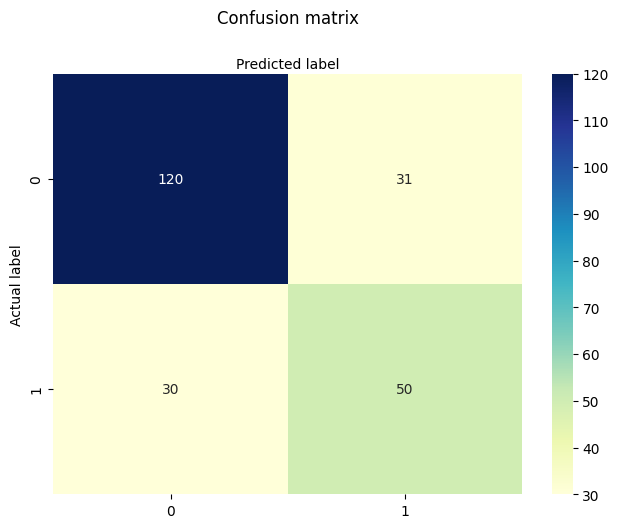

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

menampilkan classification report yang memberikan ringkasan metrik evaluasi performa model klasifikasi, seperti precision, recall, F1-score, dan accuracy. Berikut penjelasan

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      0.79      0.80       151
   with diabetes       0.62      0.62      0.62        80

        accuracy                           0.74       231
       macro avg       0.71      0.71      0.71       231
    weighted avg       0.74      0.74      0.74       231



logreg.predict_proba(X_test)[::, 1] mengambil probabilitas prediksi untuk kelas positif. Lalu, metrics.roc_curve(y_test, y_pred_proba) menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) yang digunakan untuk membuat kurva ROC. AUC (Area Under Curve) dihitung dengan metrics.roc_auc_score(y_test, y_pred_proba), yang menunjukkan seberapa baik model membedakan antara kelas positif dan negatif. Terakhir, kurva ROC diplot menggunakan plt.plot(fpr, tpr, label="data 1, auc="+str(auc)), dengan legenda di posisi kanan bawah (loc=4)

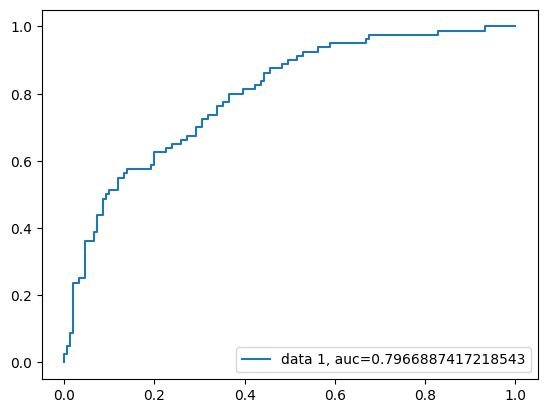

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()